In [3]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [4]:
from common import *
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics import adjusted_mutual_info_score

In [5]:
np.random.seed(0)

In [6]:
import warnings; warnings.simplefilter('ignore')

In [7]:
# Dataset Phone Price
x_train, x_test, y_train, y_test = read_dataset_income(path_to_file="../Data/dataset1/income_evaluation.csv")
x_train.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country
12132,72,4,11,6,1,4,0,40,39
24787,58,0,11,2,0,2,1,30,39
5923,42,4,11,2,3,4,1,40,39
3464,31,4,9,2,1,4,1,50,39
30739,36,4,9,0,10,4,0,50,39


In [8]:
# preventing information about the distribution of the test set leaking into your model
standard_scaler = MinMaxScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.fit_transform(x_test)

In [9]:
# Elbow Plot to obtain optimal K
sse = {}
for cluster in np.arange(1, 20):
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=0, n_jobs=-1).fit(x_train_scaled)
    print(kmeans.inertia_)
    sse[cluster] = kmeans.inertia_

15827.553317183907
9972.5082828131
8772.07713891436
8003.884933777824
7439.307476010153
6900.369131660553
6404.616798006388
5996.281930591445
5732.23657300303
5483.73263560949
5227.726836953038
5044.634519733545
4838.007091781574
4741.116748256027
4548.545121477591
4438.695737749986
4317.053352933238
4208.993170586266
4118.911906700272


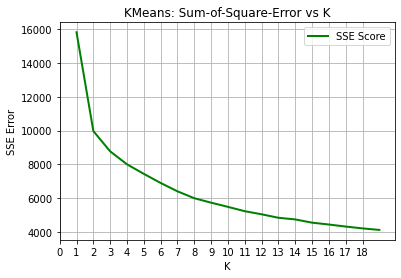

In [11]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), color="green", lw=2, label="SSE Score")
plt.title("KMeans: Sum-of-Square-Error vs K")
plt.xlabel("K")
plt.ylabel("SSE Error")
plt.xticks(np.arange(len(sse)))
plt.grid()
plt.legend()
plt.show()

In [25]:
# K = 2 for Income Dataset
K = 5

In [27]:
# Clustering without Dimensionality Reduction
start_time = time.time()
clf = KMeans(n_clusters=K, n_init=50, max_iter=100, random_state=0, n_jobs=-1).fit(x_train)
print(f"KNN Normal Model: Fit Time: {time.time() - start_time}")
start_time = time.time()
y_pred = clf.predict(x_test)
print(f"KNN Normal Model: Predict Time: {time.time() - start_time}")
print(f"Score of Model Tree are (Mean Accuracy of test and train data): {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

KNN Normal Model: Fit Time: 13.642489433288574
KNN Normal Model: Predict Time: 0.0045168399810791016
Score of Model Tree are (Mean Accuracy of test and train data): 0.069706740365423
              precision    recall  f1-score   support

           0       0.53      0.09      0.15      4917
           1       0.03      0.01      0.02      1596
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.07      6513
   macro avg       0.11      0.02      0.03      6513
weighted avg       0.41      0.07      0.12      6513



In [28]:
# Print Silhouette, Inertia and AMI for best K
k = KMeans(n_clusters=K, max_iter=100, random_state=0, n_jobs=-1).fit(x_train)
ss = silhouette_score(x_train, y_train, metric='euclidean', sample_size=None, random_state=0)
print(f"K=2, Silhouette Score: {ss}")
print(f"k=2, Homoegeneity Score: {homogeneity_score(y_train['income'].values, k.labels_)}")
print(f"K=2, Inertia: {k.inertia_}")
print(f"K=2, Adjusted Mutual Info (AMI) Score: {adjusted_mutual_info_score(y_train['income'], k.labels_)}")

K=2, Silhouette Score: 0.021464301071151434
k=2, Homoegeneity Score: 0.07851188581009366
K=2, Inertia: 4420566.353974629
K=2, Adjusted Mutual Info (AMI) Score: 0.044962556415345745


In [23]:
# Print Silhouette, Inertia and AMI for range of different K
s = {}
h = {}
for i in range(2, 20):
    clf = KMeans(n_clusters=i, n_init=50, max_iter=1000, random_state=0, n_jobs=-1).fit(x_train)
    print(i)
    s[i] = silhouette_score(x_train, clf.labels_, metric="euclidean")
    h[i] = homogeneity_score(y_train['income'].values, clf.labels_)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [24]:
sdf = pd.DataFrame(list(s.values()), columns=['Silhouette'])
sdf['Homogeneity'] = pd.DataFrame(list(h.values()))

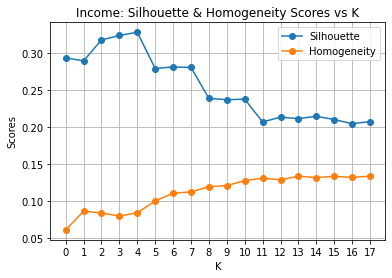

In [37]:
plt.figure()
plt.title('Income: Silhouette & Homogeneity Scores vs K')
plt.plot(sdf, 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(sdf.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()

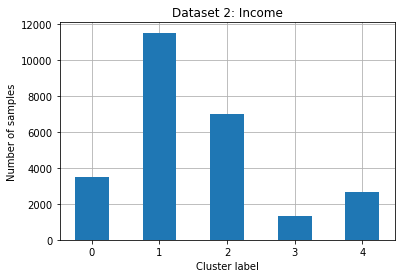

In [29]:
# plt.figure()
plt.hist(k.labels_, bins=np.arange(0, K + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, K))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2: Income')
plt.grid()

In [20]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1520,1883,0,1.6,0,9,0,24,0.1,87,1,16,203,915,3563,17,10,3,0,0,0
64,702,0,2.6,1,2,1,9,0.7,141,3,3,504,1570,2955,10,4,19,1,0,0
1431,1283,1,0.7,1,0,1,27,0.2,80,4,6,1135,1923,3957,17,15,6,1,0,0
926,1496,1,1.9,1,13,0,38,0.1,126,4,14,501,506,1927,17,4,6,0,0,1
983,1175,1,1.3,0,2,0,19,0.3,164,7,9,873,1394,1944,9,4,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,1396,1,0.6,0,0,0,37,0.7,134,4,15,560,1177,2694,18,3,19,0,0,1
1818,837,0,2.4,1,1,0,51,0.2,104,5,15,638,1831,594,16,6,20,1,0,1
724,696,0,0.5,0,6,0,51,0.3,197,3,8,649,907,2630,18,8,9,0,0,1
1160,1159,0,2.7,0,13,1,28,0.2,80,8,18,378,751,2495,10,0,9,1,1,1


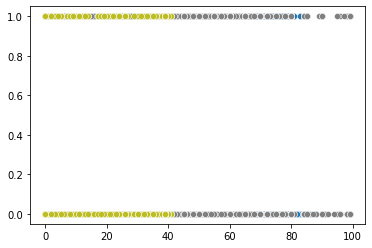

In [39]:
for c in list(x_train.columns):
    sns.scatterplot(x_train[c].values, y_train["income"].values)

### Gaussian Mixture to implement Expectation Maximization

In [40]:
s_em = {}
h_em = {}
l_em = {}
for i in range(2, 20):
    clf_gm = GaussianMixture(n_components=i, n_init=50, max_iter=100, random_state=0).fit(x_train)
    labels = clf_gm.predict(x_train)
    print(labels)
    s_em[i] = silhouette_score(x_train, labels, metric="euclidean")
    h_em[i] = homogeneity_score(y_train['income'].values, labels)
    l_em[i] = clf_gm.score(x_train)

[1 0 1 ... 1 0 1]
[2 2 0 ... 0 1 0]
[2 0 1 ... 1 3 1]
[4 1 3 ... 3 0 3]
[0 2 0 ... 3 1 3]
[6 4 1 ... 3 0 3]
[1 0 7 ... 5 2 5]
[5 1 0 ... 4 2 4]
[5 4 0 ... 6 2 6]
[2 5 1 ... 1 3 6]
[10  2  0 ...  9  6  9]
[9 2 1 ... 3 6 3]
[ 8 12 10 ...  8 11 10]
[ 9 13 11 ...  4  5 11]
[11  6 10 ...  9  4 15]
[ 1  6  4 ...  1  3 11]
[11  6 10 ...  5  4 15]
[17 10 12 ... 17  8 12]


In [41]:
gm_df = pd.DataFrame(list(s_em.values()), columns=['Silhouette'])
gm_df['Homogeneity'] = pd.DataFrame(list(h_em.values()))
gm_df['Likelihood'] = pd.DataFrame(list(l_em.values()))

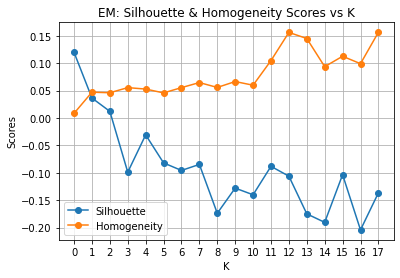

In [42]:
plt.figure()
plt.title('EM: Silhouette & Homogeneity Scores vs K')
plt.plot(gm_df[['Silhouette', 'Homogeneity']], 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(gm_df.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()

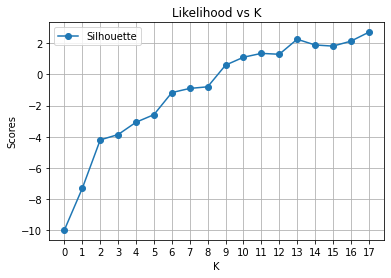

In [43]:
plt.figure()
plt.title('Likelihood vs K')
plt.plot(gm_df[['Likelihood']], 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(gm_df.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()

In [38]:
# Classification Report
gm = GaussianMixture(n_components=2, max_iter=100, random_state=0, n_init=50).fit(x_train)
labels = gm.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, labels)}")
print(classification_report(y_test, labels))

Accuracy Score: 0.3895286350376171
              precision    recall  f1-score   support

           0       0.83      0.24      0.37      4917
           1       0.27      0.85      0.41      1596

    accuracy                           0.39      6513
   macro avg       0.55      0.55      0.39      6513
weighted avg       0.69      0.39      0.38      6513



In [53]:
# gm_df_xtrain = pd.DataFrame(gm.means_, columns=['labels'])
# gm_df_xtrain
y_train.shape

(26048, 1)

In [115]:
# MLPClassifier on PhonePrice

In [31]:
# Obtain centroids via KMeans
clf_k = KMeans(n_clusters=2, n_init=50, max_iter=1000,random_state=0, n_jobs=-1).fit(x_train)
df_x_train = pd.DataFrame(clf_k.labels_, columns=['labels'])
clf_k_test = KMeans(n_clusters=2, n_init=50, max_iter=1000,random_state=0, n_jobs=-1).fit(x_test)
df_x_test = pd.DataFrame(clf_k_test.labels_, columns=['labels'])

In [34]:
# KMeans
clf_mlp = MLPClassifier()
start_time = time.time()
clf_mp = clf_mlp.fit(df_x_train, y_train)
y_pred = clf_mlp.predict(df_x_test)
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(classification_report(y_test, y_pred))
print(time.time() - start_time)

Accuracy Score: 0.7549516351911562
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      4917
           1       0.00      0.00      0.00      1596

    accuracy                           0.75      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.75      0.65      6513

1.175102949142456


In [40]:
# EM
clf_mlp = MLPClassifier()
start_time = time.time()
clf_mp = clf_mlp.fit(gm_df_xtrain, y_train)
y_pred = clf_mlp.predict(df_x_test)
print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(classification_report(y_test, y_pred))
print(time.time() - start_time)

ValueError: Found input variables with inconsistent numbers of samples: [6513, 26048]

In [ ]:
plt.plot(scores)
plt.grid()

In [ ]:
df_x_train.shape

In [ ]:
x_test.shape